In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
df =pd.read_csv('Amazon.csv',encoding='latin-1')
df.dropna(inplace=True)

**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **ID** | ID of Customers|
|02| **Warehouse_block** | The Company have big Warehouses which is divided in to block such as A,B,C,D,E|
|03|**Mode_of_Shipment**|The Company Ships the products in multiple way such as Ship, Flight and Road.|
|04|**Customer_care_calls**|The number of calls made from enquiry for enquiry of the shipment|
|05|**Customer_rating**| The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
|06|**Cost_of_the_Product**|Price of the Product|
|07|**Prior_purchases**|The Number of Prior Purchases of the customer|
|08|**Product_importance**|The company has categorized the product in the various parameter such as low, medium, high.|
|09|**Gender**|If Customer is a Male or Female|
|10|**Discount_offered**|Discount offered on that specific product|
|11|**Weight_in_gms**|It is the weight in grams|
|12|**Returned**|It is the target variable, where 1 Indicates that the product is returned|


In [269]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Returned
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [270]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Returned
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [271]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Returned
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [272]:
df.shape

(10999, 12)

In [273]:
X = df.drop(columns=['ID','Returned'])
y = df['Returned']

In [274]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (7039, 10) (7039,)
Validation: (1760, 10) (1760,)
Test  :  (2200, 10) (2200,)


#EDA



In [275]:
from category_encoders import TargetEncoder

In [276]:
enc = TargetEncoder(cols=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'])
X_train = enc.fit_transform(X_train,y_train)

X_val = enc.transform(X_val)
X_test = enc.transform(X_test)

X_test.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
107,0.601109,0.600251,4,5,216,3,0.634426,0.596148,26,2053
5594,0.578005,0.576471,3,1,220,3,0.600878,0.599487,6,5572
6997,0.601109,0.608167,3,2,215,4,0.600878,0.599487,3,4042
3984,0.600336,0.608167,5,1,160,5,0.600878,0.599487,1,4672
3111,0.602763,0.600251,5,4,229,2,0.586928,0.599487,44,2419


In [277]:
from sklearn.preprocessing import StandardScaler

In [278]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [279]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# -------------------------------------------------------
# For Reproducibility
# -------------------------------------------------------

np.random.seed(42)  
# Sets the random seed for NumPy operations
# Ensures same random numbers (e.g., train-test split, random sampling)
# Makes experiments reproducible across runs

tf.random.set_seed(42)  
# Sets the random seed for TensorFlow operations
# Ensures consistent weight initialization, dropout behavior, etc.
# Helps in reproducing the same model training results

In [280]:
def create_baseline():
    model = Sequential([
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    return model

In [281]:
model = create_baseline()

In [282]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [283]:
# -------------------------------------------------------
# Load TensorBoard Extension
# -------------------------------------------------------
%load_ext tensorboard

from datetime import datetime
import os
import shutil

# -------------------------------------------------------
# Create Log Directory with Timestamp
# -------------------------------------------------------
now = datetime.now()
log_folder = os.path.join("tf_logs", now.strftime("%Y%m%d-%H%M%S"))

# Create directory if not exists
os.makedirs(log_folder, exist_ok=True)

# -------------------------------------------------------
# Clear previous logs (optional)
# -------------------------------------------------------
if os.path.exists("tf_logs"):
    shutil.rmtree("tf_logs")
    os.makedirs(log_folder)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [284]:
# -------------------------------------------------------
# TensorBoard Callback
# -------------------------------------------------------
from tensorflow.keras.callbacks import TensorBoard

tb_callback = TensorBoard(
    log_dir=log_folder,
    histogram_freq=1
)

In [285]:
# -------------------------------------------------------
# Train Model
# -------------------------------------------------------
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=128,
    verbose=1,
    callbacks=[tb_callback]
)

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6436 - loss: 0.5602 - val_accuracy: 0.6318 - val_loss: 0.5517
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6693 - loss: 0.5179 - val_accuracy: 0.6352 - val_loss: 0.5497
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6762 - loss: 0.5131 - val_accuracy: 0.6358 - val_loss: 0.5483
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6819 - loss: 0.5100 - val_accuracy: 0.6398 - val_loss: 0.5467
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6866 - loss: 0.5065 - val_accuracy: 0.6392 - val_loss: 0.5460
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6900 - loss: 0.5037 - val_accuracy: 0.6415 - val_loss: 0.5459
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6934 - loss: 0.5007 - val_accuracy: 0.6415 - val_loss: 0.5467
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6985 - loss: 0.4981 - val_accuracy: 0.6415 - val

In [286]:
model.evaluate(X_train,y_train)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7731 - loss: 0.4202


[0.42016544938087463, 0.773121178150177]

In [287]:
model.evaluate(X_val,y_val)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6347 - loss: 0.6527


[0.652710497379303, 0.6346591114997864]

In [288]:
%tensorboard --logdir tf_logs



Reusing TensorBoard on port 6006 (pid 8164), started 1 day, 5:02:59 ago. (Use '!kill 8164' to kill it.)

Regularization


Lets now implement L2 Regularization on the Baseline Model

In [289]:

def create_baseline():
    # lambda = 0.01
    L2Reg = tf.keras.regularizers.L2(l2=1e-2)
    model = Sequential([
        Dense(256, activation="relu",kernel_regularizer=L2Reg),
        Dense(128, activation="relu",kernel_regularizer=L2Reg),
        Dense(64, activation="relu",kernel_regularizer=L2Reg),
        Dense(32, activation="relu",kernel_regularizer=L2Reg),
        Dense(16, activation="relu",kernel_regularizer=L2Reg),
        Dense(8, activation="relu",kernel_regularizer=L2Reg),
        Dense(1, activation="sigmoid")
    ])
    return model

In [290]:
model = create_baseline()

model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [291]:
# -------------------------------------------------------
# Load TensorBoard Extension
# -------------------------------------------------------
%load_ext tensorboard

from datetime import datetime
import os
import shutil

# -------------------------------------------------------
# Create Log Directory with Timestamp
# -------------------------------------------------------
now = datetime.now()
log_folder = os.path.join("tf_logs", now.strftime("%Y%m%d-%H%M%S"))

# Create directory if not exists
os.makedirs(log_folder, exist_ok=True)

# -------------------------------------------------------
# Clear previous logs (optional)
# -------------------------------------------------------
if os.path.exists("tf_logs"):
    shutil.rmtree("tf_logs")
    os.makedirs(log_folder)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [292]:
# -------------------------------------------------------
# TensorBoard Callback
# -------------------------------------------------------
from tensorflow.keras.callbacks import TensorBoard

tb_callback = TensorBoard(
    log_dir=log_folder,
    histogram_freq=1
)

In [293]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=30, batch_size=128, verbose=1,callbacks=[tb_callback])

Epoch 1/30


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5806 - loss: 2.8212 - val_accuracy: 0.5966 - val_loss: 1.8234
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5978 - loss: 1.3716 - val_accuracy: 0.5966 - val_loss: 1.0421
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6048 - loss: 0.8725 - val_accuracy: 0.6284 - val_loss: 0.7837
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6595 - loss: 0.7175 - val_accuracy: 0.6295 - val_loss: 0.6980
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6619 - loss: 0.6594 - val_accuracy: 0.6313 - val_loss: 0.6623
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6639 - loss: 0.6327 - val_accuracy: 0.6267 - val_loss: 0.6446
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6646 - loss: 0.6187 - val_accuracy: 0.6295 - val_loss: 0.6349
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6659 - loss: 0.6108 - val_accuracy: 0.6290 - val_loss: 0.6290

In [294]:
model.evaluate(X_train, y_train)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6794 - loss: 0.5860


[0.5859929323196411, 0.6793578863143921]

In [295]:
model.evaluate(X_val, y_val)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6415 - loss: 0.6107


[0.6107356548309326, 0.6414772868156433]

In [296]:
%tensorboard --logdir tf_logs

Reusing TensorBoard on port 6006 (pid 8164), started 1 day, 5:03:33 ago. (Use '!kill 8164' to kill it.)

#Dropout 

With this lets now implement Dropout using Tensorflow Keras

In [297]:
from tensorflow.keras.layers import Dropout
def create_Dropout():
    # lambda = 0.01
    L2Reg = tf.keras.regularizers.L2(l2=1e-3)
    model = Sequential([
                    Dense(256, activation="relu", kernel_regularizer = L2Reg ),
                    Dense(128, activation="relu", kernel_regularizer = L2Reg ),
                    Dropout(0.1),
                    Dense(64, activation="relu", kernel_regularizer = L2Reg),
                    Dense(32, activation="relu", kernel_regularizer = L2Reg),
                    Dropout(0.1),
                    Dense(32, activation="relu", kernel_regularizer = L2Reg),
                    Dense(16, activation="relu", kernel_regularizer = L2Reg),
                    Dense(8, activation="relu", kernel_regularizer = L2Reg),

                    Dense(1 , activation = 'sigmoid')])
    return model

In [298]:
model = create_Dropout()

model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [299]:
# -------------------------------------------------------
# Load TensorBoard Extension
# -------------------------------------------------------
%load_ext tensorboard

from datetime import datetime
import os
import shutil

# -------------------------------------------------------
# Create Log Directory with Timestamp
# -------------------------------------------------------
now = datetime.now()
log_folder = os.path.join("tf_logs", now.strftime("%Y%m%d-%H%M%S"))

# Create directory if not exists
os.makedirs(log_folder, exist_ok=True)

# -------------------------------------------------------
# Clear previous logs (optional)
# -------------------------------------------------------
if os.path.exists("tf_logs"):
    shutil.rmtree("tf_logs")
    os.makedirs(log_folder)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [300]:
# -------------------------------------------------------
# TensorBoard Callback
# -------------------------------------------------------
from tensorflow.keras.callbacks import TensorBoard

tb_callback = TensorBoard(
    log_dir=log_folder,
    histogram_freq=1
)

In [301]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=30, batch_size=128, verbose=1,callbacks=[tb_callback])

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6254 - loss: 0.8872 - val_accuracy: 0.6392 - val_loss: 0.7760
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6649 - loss: 0.7055 - val_accuracy: 0.6432 - val_loss: 0.6871
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6745 - loss: 0.6376 - val_accuracy: 0.6392 - val_loss: 0.6435
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6762 - loss: 0.6023 - val_accuracy: 0.6381 - val_loss: 0.6162
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6786 - loss: 0.5793 - val_accuracy: 0.6386 - val_loss: 0.5993
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6815 - loss: 0.5661 - val_accuracy: 0.6426 - val_loss: 0.5890
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6811 - loss: 0.5572 - val_accuracy: 0.6438 - val_loss: 0.5814
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6845 - loss: 0.5488 - val_accuracy: 0.6477 - v

In [302]:
model.evaluate(X_train, y_train)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6967 - loss: 0.5174


[0.5174015760421753, 0.6966898441314697]

In [303]:
model.evaluate(X_val, y_val)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6500 - loss: 0.5575


[0.5575104355812073, 0.6499999761581421]

In [304]:
%tensorboard --logdir tf_logs

Reusing TensorBoard on port 6006 (pid 8164), started 1 day, 5:04:26 ago. (Use '!kill 8164' to kill it.)

In [305]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import relu

def create_BatchNormalization_model():
    L2Reg = tf.keras.regularizers.L2(l2=1e-2)
    model = Sequential([
                    Dense(256, kernel_regularizer = L2Reg),
                    BatchNormalization(),
                    Activation(relu),
                    Dropout(0.2),
                    Dense(128, kernel_regularizer = L2Reg),
                    BatchNormalization(),
                    Activation(relu),
                    Dense(64,kernel_regularizer = L2Reg ),
                    BatchNormalization(),
                    Activation(relu),
                    Dense(32,kernel_regularizer = L2Reg ),
                    BatchNormalization(),
                    Activation(relu),
                    Dense(16,kernel_regularizer = L2Reg ),
                    BatchNormalization(),
                    Activation(relu),
                    Dense(8,kernel_regularizer = L2Reg ),
                    BatchNormalization(),
                    Activation(relu),
                    Dense(1,activation='sigmoid')])
    return model

In [306]:
model = create_BatchNormalization_model()

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [307]:
# -------------------------------------------------------
# Load TensorBoard Extension
# -------------------------------------------------------
%load_ext tensorboard

from datetime import datetime
import os
import shutil

# -------------------------------------------------------
# Create Log Directory with Timestamp
# -------------------------------------------------------
now = datetime.now()
log_folder = os.path.join("tf_logs", now.strftime("%Y%m%d-%H%M%S"))

# Create directory if not exists
os.makedirs(log_folder, exist_ok=True)

# -------------------------------------------------------
# Clear previous logs (optional)
# -------------------------------------------------------
if os.path.exists("tf_logs"):
    shutil.rmtree("tf_logs")
    os.makedirs(log_folder)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [309]:
# -------------------------------------------------------
# TensorBoard Callback
# -------------------------------------------------------
from tensorflow.keras.callbacks import TensorBoard

tb_callback = TensorBoard(
    log_dir=log_folder,
    histogram_freq=1
)

In [310]:
import keras
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "/bestmodel_of_rev_logistic.keras",
    monitor = "val_loss"
)

In [311]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=30, batch_size=128, verbose=1,callbacks=[tb_callback,model_checkpoint])


Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.6275 - loss: 3.5089 - val_accuracy: 0.5955 - val_loss: 2.9439
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6589 - loss: 2.3516 - val_accuracy: 0.5966 - val_loss: 2.0142
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6615 - loss: 1.6202 - val_accuracy: 0.5966 - val_loss: 1.4628
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6718 - loss: 1.1949 - val_accuracy: 0.5966 - val_loss: 1.1462
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6686 - loss: 0.9486 - val_accuracy: 0.5966 - val_loss: 0.9553
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6750 - loss: 0.7987 - val_accuracy: 0.5949 - val_loss: 0.8291
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6789 - loss: 0.7049 - val_accuracy: 0.5938 - val_loss: 0.7562
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6789 - loss: 0.6481 - val_accuracy: 0.5977 - v

In [312]:
model.evaluate(X_train, y_train)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6794 - loss: 0.5248


[0.5247562527656555, 0.6793578863143921]

In [313]:
model.evaluate(X_val, y_val)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6415 - loss: 0.5565


[0.556450605392456, 0.6414772868156433]

In [314]:
%tensorboard --logdir tf_logs

Reusing TensorBoard on port 6006 (pid 8164), started 1 day, 5:07:09 ago. (Use '!kill 8164' to kill it.)

In [152]:
#Early Stopping

In [315]:
model = create_BatchNormalization_model()

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [316]:
# -------------------------------------------------------
# Load TensorBoard Extension
# -------------------------------------------------------
%load_ext tensorboard

from datetime import datetime
import os
import shutil

# -------------------------------------------------------
# Create Log Directory with Timestamp
# -------------------------------------------------------
now = datetime.now()
log_folder = os.path.join("tf_logs", now.strftime("%Y%m%d-%H%M%S"))

# Create directory if not exists
os.makedirs(log_folder, exist_ok=True)

# -------------------------------------------------------
# Clear previous logs (optional)
# -------------------------------------------------------
if os.path.exists("tf_logs"):
    shutil.rmtree("tf_logs")
    os.makedirs(log_folder)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [317]:
# -------------------------------------------------------
# TensorBoard Callback
# -------------------------------------------------------
from tensorflow.keras.callbacks import TensorBoard

tb_callback = TensorBoard(
    log_dir=log_folder,
    histogram_freq=1
)

In [318]:
EarlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50,  restore_best_weights=True)
ModelCheckpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath='tf_model.h5',
                                                             monitor='val_accuracy',
                                                             save_best_only=True,
                                                             mode='max')

In [319]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=15, batch_size=128, verbose=0, callbacks=[EarlyStoppingCallback, ModelCheckpointCallback,tb_callback])


In [320]:
%tensorboard --logdir tf_logs

Reusing TensorBoard on port 6006 (pid 8164), started 1 day, 5:12:01 ago. (Use '!kill 8164' to kill it.)

In [321]:
model = create_BatchNormalization_model()
model.build(input_shape =(None,10))

In [322]:
model.load_weights('tf_model.h5')

In [323]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [324]:
model.evaluate(X_train, y_train)

220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6508 - loss: 0.5707


[0.5707260966300964, 0.6508026719093323]

In [325]:
model.evaluate(X_val, y_val)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6233 - loss: 0.6001


[0.6000549793243408, 0.6232954263687134]

In [326]:
model.evaluate(X_test, y_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6486 - loss: 0.5782


[0.5782266855239868, 0.6486363410949707]

In [327]:
output = model.predict(X_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [328]:
y_pred = np.array([1 if i > 0.5 else 0  for i in output])

Text(0.5, -37.51948493120013, 'Predicted label')

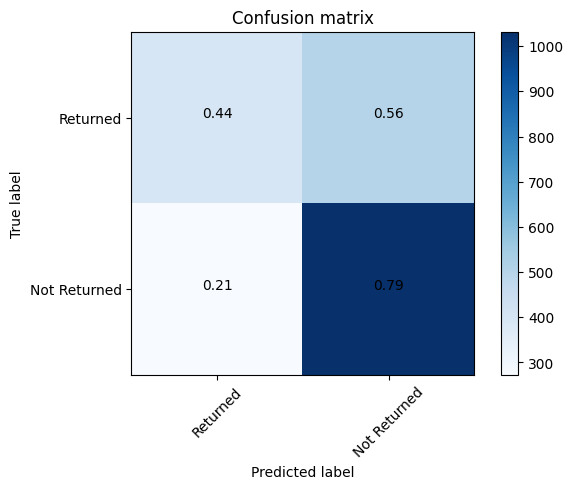

In [329]:
import itertools
import sklearn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()

class_names = ['Returned','Not Returned']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Normalize the confusion matrix.
cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

# Use white text if squares are dark; otherwise black.
threshold = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color =  "black"
    plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [330]:
fpr,tpr,_ = sklearn.metrics.roc_curve(y_test,output.squeeze(axis=1))

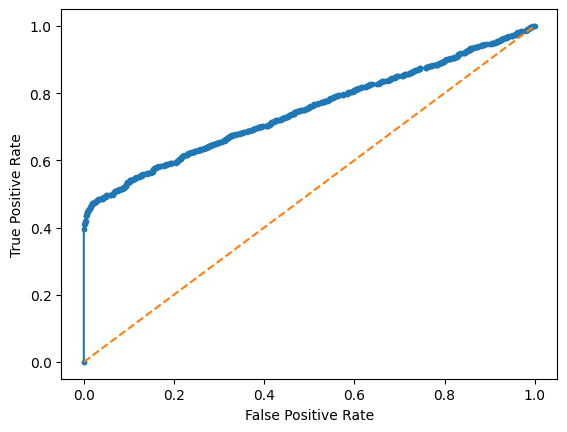

In [331]:
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate' )
plt.show()